In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy import stats
from scipy.optimize import minimize

# Optical path dependence with $\theta$ (BBO's perfectly aligned)

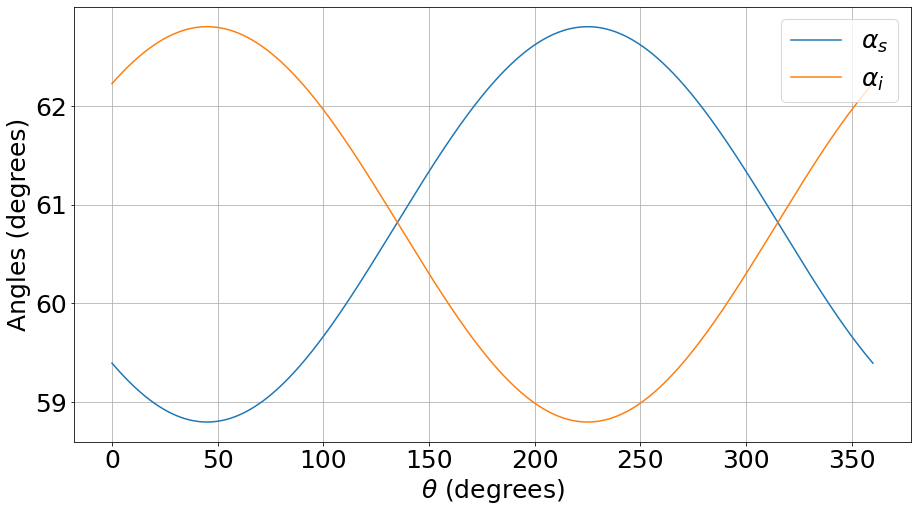

In [3]:
# We define the parameters of our problem
theta_c = np.deg2rad(2)
alpha_PM = np.deg2rad(29.2)
d = 0.0002
n_e = 1.655
n_o = 1.542

# Convert degrees to radians
theta = np.radians(np.linspace(0, 360, 1000))

# Calculate the functions of the angles
alpha_s = np.arccos(np.cos(theta_c)*np.sin(alpha_PM) + np.sin(theta_c)*np.cos(alpha_PM)*np.sin(np.deg2rad(45)+theta))
alpha_i = np.arccos(np.cos(theta_c)*np.sin(alpha_PM) - np.sin(theta_c)*np.cos(alpha_PM)*np.sin(np.deg2rad(45)+theta))

# Plot the function
plt.figure(figsize=(15, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(np.degrees(theta), np.degrees(alpha_s), label=r'$\alpha_{s}$')
plt.plot(np.degrees(theta), np.degrees(alpha_i), label=r'$\alpha_i$')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Angles (degrees)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

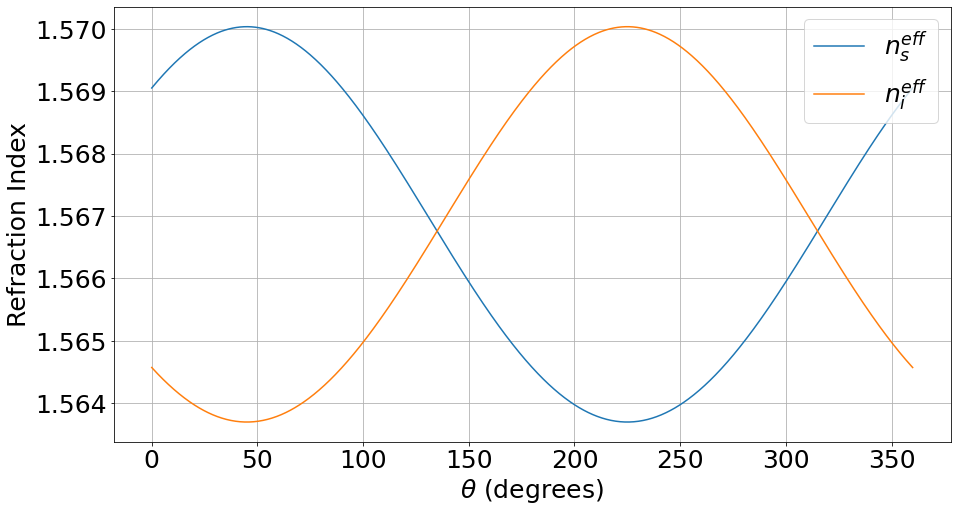

In [4]:
def n_eff(angle, n_e, n_o):
    return np.sqrt(1/((np.cos(angle)/n_e)**2 + (np.sin(angle)/n_o)**2))

Neff_s = [n_eff(x, n_e, n_o) for x in alpha_s]
Neff_i = [n_eff(x, n_e, n_o) for x in alpha_i]

# Graficar la función
plt.figure(figsize=(15, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(np.degrees(theta), Neff_s, label=r'$n^{eff}_s$')
plt.plot(np.degrees(theta), Neff_i, label=r'$n^{eff}_i$')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('Refraction Index')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Optical path dependence with $\theta$ (BBO's tilted an angle $\gamma$)

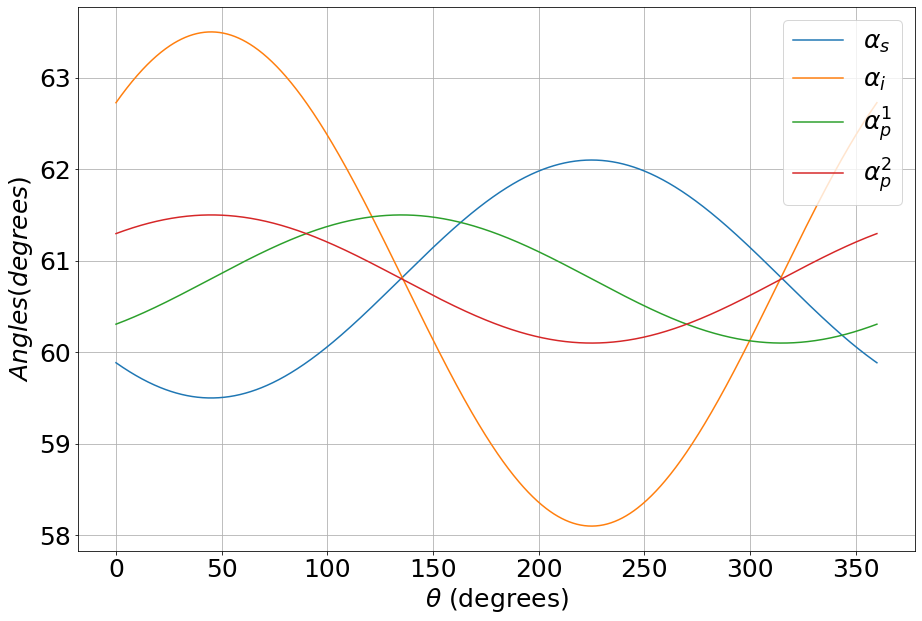

In [27]:
#We assign a value to the angle by which the BBO crystals are misaligned
gamma = np.deg2rad(-0.7)

angles = list(range(0, 361, 10))

alpha_s_tilted = np.arccos(np.cos(theta_c+gamma)*np.sin(alpha_PM) + np.sin(theta_c+gamma)*np.cos(alpha_PM)*np.sin(np.deg2rad(45)+theta))
alpha_i_tilted = np.arccos(np.cos(theta_c-gamma)*np.sin(alpha_PM) - np.sin(theta_c-gamma)*np.cos(alpha_PM)*np.sin(np.deg2rad(45)+theta))
alpha_p1_tilted = np.arccos(np.sin(gamma)*np.cos(alpha_PM)*np.sin(np.deg2rad(-45)+theta)+np.cos(gamma)*np.sin(alpha_PM))
alpha_p2_tilted = np.arccos(np.sin(gamma)*np.cos(alpha_PM)*np.sin(np.deg2rad(45)+theta)+np.cos(gamma)*np.sin(alpha_PM))


# Plot the function
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 25})
plt.plot(np.degrees(theta), np.degrees(alpha_s_tilted), label=r"$\alpha_s$")
plt.plot(np.degrees(theta), np.degrees(alpha_i_tilted), label=r"$\alpha_i$")
plt.plot(np.degrees(theta), np.degrees(alpha_p1_tilted), label=r"$\alpha_p^1$")
plt.plot(np.degrees(theta), np.degrees(alpha_p2_tilted), label=r"$\alpha_p^2$")
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('$Angles (degrees)$')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

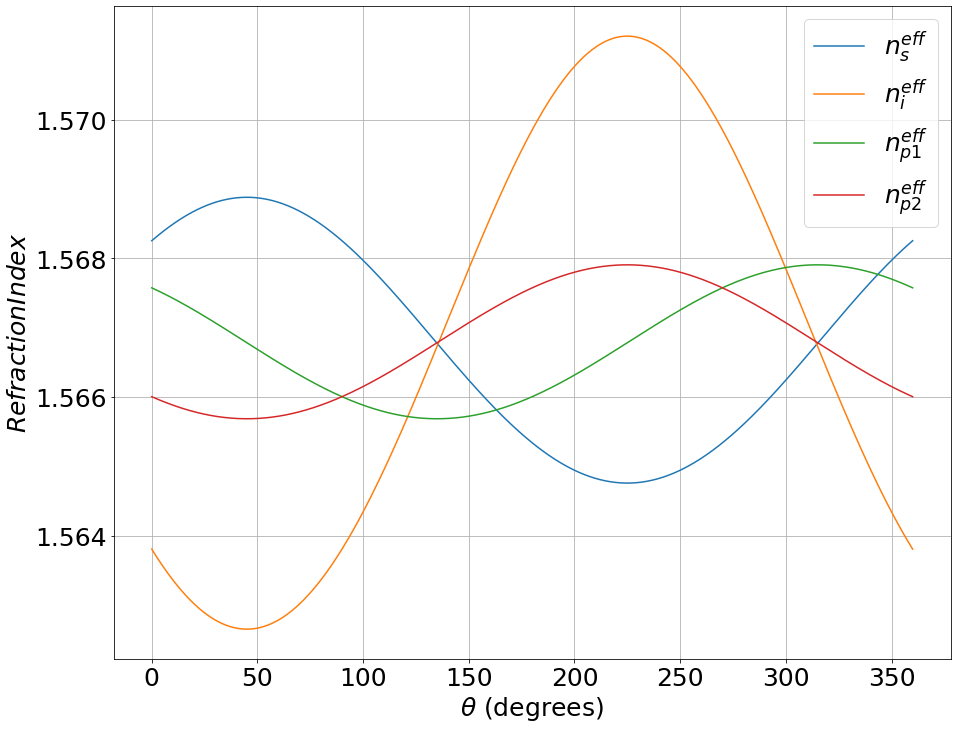

In [28]:
Neff_s_tilted = [n_eff(x, n_e, n_o) for x in alpha_s_tilted]
Neff_i_tilted = [n_eff(x, n_e, n_o) for x in alpha_i_tilted]
Neff_p1_tilted = [n_eff(x, n_e, n_o) for x in alpha_p1_tilted]
Neff_p2_tilted = [n_eff(x, n_e, n_o) for x in alpha_p2_tilted]


# Graficar la función
plt.figure(figsize=(15, 12))
plt.rcParams.update({'font.size': 25})
plt.plot(np.degrees(theta), Neff_s_tilted, label=r"$n^{eff}_s$")
plt.plot(np.degrees(theta), Neff_i_tilted, label=r"$n^{eff}_i$")
plt.plot(np.degrees(theta), Neff_p1_tilted, label=r"$n^{eff}_{p1}$")
plt.plot(np.degrees(theta), Neff_p2_tilted, label=r"$n^{eff}_{p2}$")
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('$Refraction Index$')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

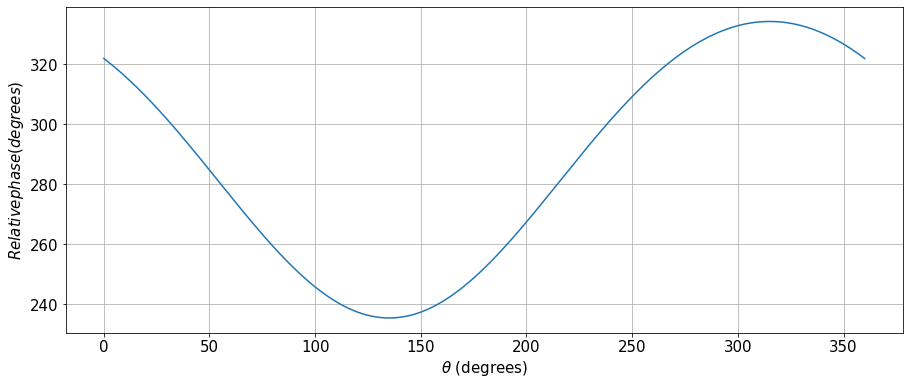

In [29]:
def adjust_angles(list_angles):
    adjusted_angles = []
    for angle in list_angles:
        adjusted_angle = angle % 360
        adjusted_angles.append(adjusted_angle)
    return adjusted_angles

def RelativePhase(THeta, n_e, n_o):
    
    alpha_s_tilted = np.arccos(np.cos(theta_c+gamma)*np.sin(alpha_PM) + np.sin(theta_c+gamma)*np.cos(alpha_PM)*np.sin(np.deg2rad(45)+THeta))
    alpha_i_tilted = np.arccos(np.cos(theta_c-gamma)*np.sin(alpha_PM) - np.sin(theta_c-gamma)*np.cos(alpha_PM)*np.sin(np.deg2rad(45)+THeta))
    alpha_p1_tilted = np.arccos(np.sin(gamma)*np.cos(alpha_PM)*np.sin(np.deg2rad(-45)+THeta)+np.cos(gamma)*np.sin(alpha_PM))
    alpha_p2_tilted = np.arccos(np.sin(gamma)*np.cos(alpha_PM)*np.sin(np.deg2rad(45)+THeta)+np.cos(gamma)*np.sin(alpha_PM))
    
    return 2*math.pi*(d/4)*1000000000*((-2/(405*np.cos(gamma)))*n_o + (1/(405*np.cos(gamma)))*(n_eff(alpha_p1_tilted,n_e,n_o) - n_eff(alpha_p2_tilted,n_e,n_o)) + (1/810)*((n_eff(alpha_s_tilted,n_e,n_o)/np.cos(theta_c+gamma))+(n_eff(alpha_i_tilted,n_e,n_o)/np.cos(theta_c-gamma))))


theta = np.radians(np.linspace(0, 360, 1000))
# We calculate the relative phase for every value of theta
RelativePhase_tilted = [RelativePhase(x, n_e, n_o) for x in theta]
# We adjust the phase value at each point to be within the range of 0 to 360 degrees
RelativePhase_tilted = np.radians(adjust_angles(np.degrees(RelativePhase_tilted)))


# We plot the relative phase dependence as a function of theta
plt.figure(figsize=(15, 6))
plt.rcParams.update({'font.size': 15})
plt.plot(np.degrees(theta), np.degrees(RelativePhase_tilted))
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('$Relative phase (degrees)$')
plt.grid(True)
plt.show()

Next, we will define the functions that give us the probability of finding the photons pairs in the VV, HH, VH, and HV states as a function of the BBO's angle $\theta$ and the relative phase $\phi$ .

In [30]:
def P_VV_theta(theta, phi):
    Theta = np.deg2rad(theta)
    Phi = np.deg2rad(phi)
    Prob = np.cos(np.deg2rad(45)+Theta)**6 + np.sin(np.deg2rad(45)+Theta)**6 - 2*np.cos(Phi)*np.cos(np.deg2rad(45)+Theta)**3*np.sin(np.deg2rad(45)+Theta)**3

    return Prob

def P_HH_theta(theta, phi):
    Theta = np.radians(theta)
    Phi = np.radians(phi)
    Prob = np.cos(np.deg2rad(45)+Theta)**4*np.sin(np.deg2rad(45)+Theta)**2 + np.cos(np.deg2rad(45)+Theta)**2*np.sin(np.deg2rad(45)+Theta)**4 - 2*np.cos(Phi)*np.cos(np.deg2rad(45)+Theta)**3*np.sin(np.deg2rad(45)+Theta)**3
    
    return Prob

def P_VH_theta(theta, phi):
    Theta = np.radians(theta)
    Phi = np.radians(phi)
    Prob = np.cos(np.deg2rad(45)+Theta)**4*np.sin(np.deg2rad(45)+Theta)**2 + np.cos(np.deg2rad(45)+Theta)**2*np.sin(np.deg2rad(45)+Theta)**4 + 2*np.cos(Phi)*np.cos(np.deg2rad(45)+Theta)**3*np.sin(np.deg2rad(45)+Theta)**3
    
    return Prob

def P_HV_theta(theta, phi):
    Theta = np.radians(theta)
    Phi = np.radians(phi)
    Prob = np.cos(np.deg2rad(45)+Theta)**4*np.sin(np.deg2rad(45)+Theta)**2 + np.cos(np.deg2rad(45)+Theta)**2*np.sin(np.deg2rad(45)+Theta)**4 + 2*np.cos(Phi)*np.cos(np.deg2rad(45)+Theta)**3*np.sin(np.deg2rad(45)+Theta)**3
    
    return Prob

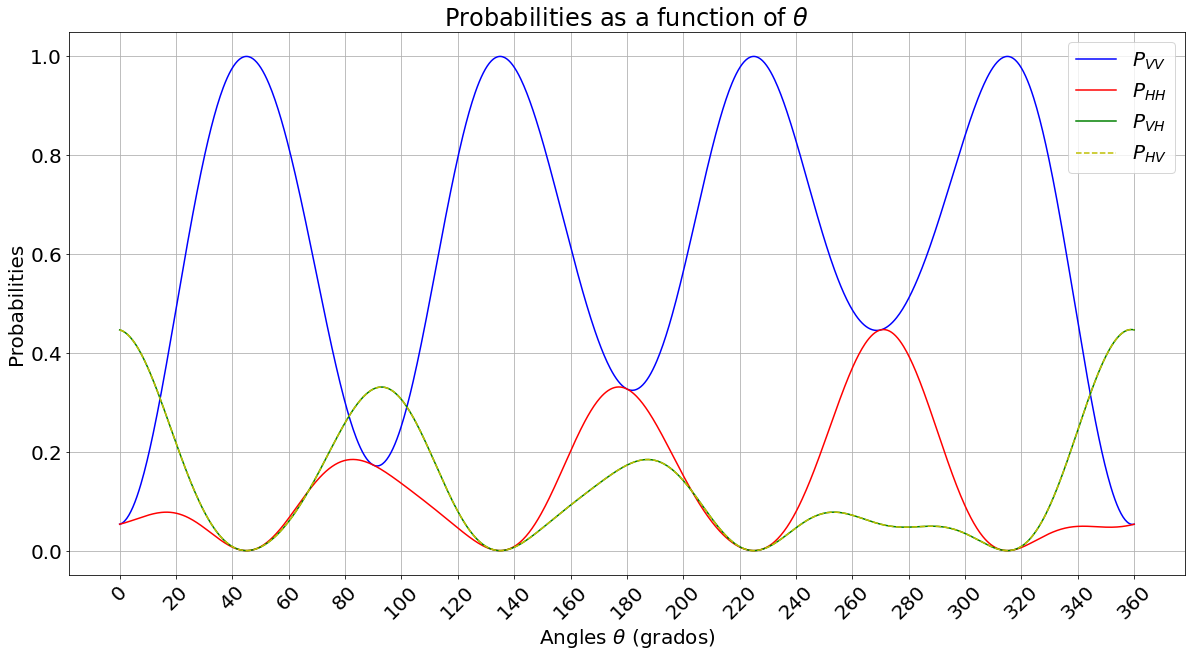

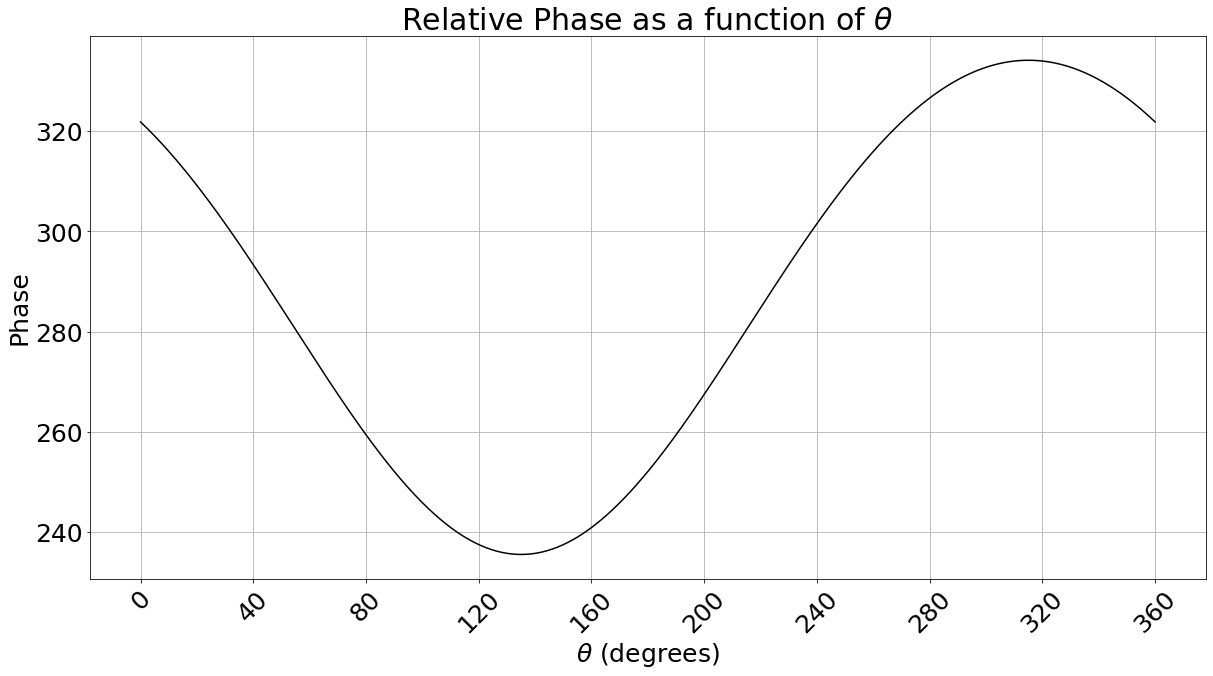

In [31]:
# Generate the values of the x-axis in degrees
x = np.linspace(0, 360, 1000)

P_vv = []
P_hh = []
P_vh = []
P_hv = []
phase = []

for i,j in zip(x,RelativePhase_tilted):
    P_vv.append(P_VV_theta(i,np.rad2deg(j)))
    P_hh.append(P_HH_theta(i,np.rad2deg(j)))
    P_vh.append(P_VH_theta(i,np.rad2deg(j)))
    P_hv.append(P_HV_theta(i,np.rad2deg(j)))
    phase.append(np.rad2deg(j))


plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 20})
plt.xlabel(r'Angles $\theta$ (grados)')
plt.ylabel(r'Probabilities')
plt.title(r'Probabilities as a function of $\theta$')
plt.plot(x, P_vv,"-b", label="$P_{VV}$")
plt.plot(x, P_hh,"-r", label="$P_{HH}$")
plt.plot(x, P_vh,"-g", label="$P_{VH}$")
plt.plot(x, P_hv,"--y", label="$P_{HV}$")
plt.xticks(angles[::2], rotation=45) 
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 25})
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'Phase')
plt.title(r'Relative Phase as a function of $\theta$')
plt.plot(x, phase,"-k", label="Phase")
plt.xticks(angles[::4], rotation=45) 
plt.grid(True)
plt.show()